# Project Title: _Startup Landscape Across Countries and Industries: Exploratory Data Analysis with Jupyter Notebook_

## Business Context
You are an analyst for a market research company that specializes in analyzing the global startup landscape. Prepare a presentation on the startups environment to stakeholders such as investors, entrepreneurs and policymakers.

## Topics to Explore
- Investment distribution by country
- Valuations distribution by industry
- Investor strategies
- Correlation between macroeconomic indicators and startup revenue
- Trend of valuations across time

# Part 1: _Startups_ Dataset

## Loading & Inspecting

In [190]:
#Import libraries
import pandas as pd
import numpy as np

#Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

We import the dataset from [Kaggle](https://www.kaggle.com/datasets/adilshamim8/startup-growth-and-investment-data). 

In [191]:
# Load startups dataset from Kaggle
startups_df = pd.read_csv("startups_data.csv")

In [192]:
startups_df.head()

,startup_id,startup_name,founded_year,country,region,industry,funding_round,funding_amount_usd,funding_date,lead_investor,co_investors,employee_count,estimated_revenue_usd,estimated_valuation_usd,exited,exit_type,tags
0,456bf4d2-b982-41e7-83fe-04bac2053405,Rice-Martinez,2008,Latvia,North America,Blockchain,Series A,764048000,2020-03-15,Sequoia,Y Combinator,106,2.898777e+08,5.187327e+09,False,NaN,"EdTech, Mobile"
1,ed442136-e5ec-43c5-afdf-a2dc08c5d4a2,Edwards-Page,2006,Guyana,North America,Fintech,Series A,379993000,2017-04-09,Tiger Global,"Accel, Tiger Global, Sequoia",735,4.567835e+07,1.234201e+09,False,NaN,"Cloud, IoT, SaaS, AI, Mobile"
2,a2cdddb6-9944-49c1-9391-6c98eb18f694,Thomas Ltd,2010,Uzbekistan,Oceania,SaaS,Series A,2513368000,2015-09-09,Sequoia,Index Ventures,346,1.489498e+08,2.452866e+10,True,Acquisition,"Marketplace, HealthTech"
3,eccc5d1e-54d8-4e60-ac80-7ff2cf98f3ba,Davis Inc,2013,Equatorial Guinea,North America,Blockchain,Series B,1029083000,2018-10-15,Accel,"Accel, Tiger Global",302,4.369478e+08,3.806283e+09,False,NaN,"EdTech, Cloud, B2B, AI"
4,81d6dfb6-63c7-4e0e-ad85-bd92d6a9302b,"Ryan, Dominguez and Klein",2012,Lithuania,Asia,Fintech,Series D,265731000,2020-01-12,Index Ventures,SoftBank,286,4.966752e+07,1.647014e+09,False,NaN,"B2C, Marketplace, EdTech, Cloud"


In [193]:
startups_df.shape

(50000, 17)

In [194]:
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   startup_id               50000 non-null  object 
 1   startup_name             50000 non-null  object 
 2   founded_year             50000 non-null  int64  
 3   country                  50000 non-null  object 
 4   region                   50000 non-null  object 
 5   industry                 50000 non-null  object 
 6   funding_round            50000 non-null  object 
 7   funding_amount_usd       50000 non-null  int64  
 8   funding_date             50000 non-null  object 
 9   lead_investor            50000 non-null  object 
 10  co_investors             50000 non-null  object 
 11  employee_count           50000 non-null  int64  
 12  estimated_revenue_usd    50000 non-null  float64
 13  estimated_valuation_usd  50000 non-null  float64
 14  exited                

In [195]:
startups_df.describe()

,founded_year,funding_amount_usd,employee_count,estimated_revenue_usd,estimated_valuation_usd
count,50000.000000,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04
mean,2013.980260,8.119339e+08,502.425040,2.231884e+08,4.887720e+09
std,5.491855,1.273724e+09,289.125299,4.014473e+08,8.277873e+09
min,2005.000000,3.925000e+06,2.000000,6.220172e+05,1.279469e+07
25%,2009.000000,2.102280e+08,252.000000,4.554807e+07,1.092857e+09
50%,2014.000000,4.398320e+08,503.000000,1.068597e+08,2.442209e+09
75%,2019.000000,9.262392e+08,752.000000,2.455208e+08,5.465729e+09
max,2023.000000,6.103712e+10,1000.000000,2.304189e+10,3.220605e+11


In [196]:
startups_df.isnull().sum()

startup_id                     0
startup_name                   0
founded_year                   0
country                        0
region                         0
industry                       0
funding_round                  0
funding_amount_usd             0
funding_date                   0
lead_investor                  0
co_investors                   0
employee_count                 0
estimated_revenue_usd          0
estimated_valuation_usd        0
exited                         0
exit_type                  45100
tags                           0
dtype: int64

In [197]:
startups_df.duplicated().sum()

0

## Cleaning

In [198]:
# Check columns
print(startups_df.columns)

Index(['startup_id', 'startup_name', 'founded_year', 'country', 'region',
       'industry', 'funding_round', 'funding_amount_usd', 'funding_date',
       'lead_investor', 'co_investors', 'employee_count',
       'estimated_revenue_usd', 'estimated_valuation_usd', 'exited',
       'exit_type', 'tags'],
      dtype='object')


In [199]:
#Drop unnecessary columns
startups_df = startups_df.drop(['region', 'funding_round', 'funding_date', 'co_investors', 'exited', 'exit_type', 'tags'], axis=1)
startups_df.head()

,startup_id,startup_name,founded_year,country,industry,funding_amount_usd,lead_investor,employee_count,estimated_revenue_usd,estimated_valuation_usd
0,456bf4d2-b982-41e7-83fe-04bac2053405,Rice-Martinez,2008,Latvia,Blockchain,764048000,Sequoia,106,2.898777e+08,5.187327e+09
1,ed442136-e5ec-43c5-afdf-a2dc08c5d4a2,Edwards-Page,2006,Guyana,Fintech,379993000,Tiger Global,735,4.567835e+07,1.234201e+09
2,a2cdddb6-9944-49c1-9391-6c98eb18f694,Thomas Ltd,2010,Uzbekistan,SaaS,2513368000,Sequoia,346,1.489498e+08,2.452866e+10
3,eccc5d1e-54d8-4e60-ac80-7ff2cf98f3ba,Davis Inc,2013,Equatorial Guinea,Blockchain,1029083000,Accel,302,4.369478e+08,3.806283e+09
4,81d6dfb6-63c7-4e0e-ad85-bd92d6a9302b,"Ryan, Dominguez and Klein",2012,Lithuania,Fintech,265731000,Index Ventures,286,4.966752e+07,1.647014e+09


In [200]:
# Show unique country values
list_of_countries = sorted(startups_df['country'].unique())
print(list_of_countries)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antarctica (the territory South of 60 deg S)', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Bouvet Island (Bouvetoya)', 'Brazil', 'British Indian Ocean Territory (Chagos Archipelago)', 'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Christmas Island', 'Cocos (Keeling) Islands', 'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'E

In [201]:
# Filter for countries that are USA, UK, Canada, Australia, Singapore, Sweden, Germany, France, Switzerland, Netherlands
# Spelling must match to corresponding value in the array above
# Choice of countries is influenced by (https://www.startupblink.com/blog/the-best-countries-for-startups/)
startups_df = startups_df[startups_df['country'].isin([
    'United States of America',
    'United Kingdom',
    'Canada',
    'Australia',
    'Singapore',
    'Sweden',
    'Germany',
    'France',
    'Switzerland',
    'Netherlands'])]


In [202]:
# Check missing values
startups_df.isnull().sum()

startup_id                 0
startup_name               0
founded_year               0
country                    0
industry                   0
funding_amount_usd         0
lead_investor              0
employee_count             0
estimated_revenue_usd      0
estimated_valuation_usd    0
dtype: int64

In [203]:
# Reset startup_id sequence
startups_df['startup_id'] = range(1, len(startups_df) + 1)

# Check
print(startups_df['startup_id'])

14          1
28          2
31          3
39          4
56          5
         ... 
49878    2033
49889    2034
49891    2035
49968    2036
49977    2037
Name: startup_id, Length: 2037, dtype: int64


In [204]:
#Make estimated_revenue_usd and estimated_valuation_usd more readable
startups_df['estimated_revenue_usd'] = startups_df['estimated_revenue_usd'].apply(lambda x: f"{x:.0f}")
startups_df['estimated_valuation_usd'] = startups_df['estimated_valuation_usd'].apply(lambda x: f"{x:.0f}")

In [205]:
# Save estimated_revenue_usd and estimated_valuation_usd columns as int
startups_df['estimated_revenue_usd'] = startups_df['estimated_revenue_usd'].astype('int64')
startups_df['estimated_valuation_usd'] = startups_df['estimated_valuation_usd'].astype('int64')

startups_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, 14 to 49977
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   startup_id               2037 non-null   int64 
 1   startup_name             2037 non-null   object
 2   founded_year             2037 non-null   int64 
 3   country                  2037 non-null   object
 4   industry                 2037 non-null   object
 5   funding_amount_usd       2037 non-null   int64 
 6   lead_investor            2037 non-null   object
 7   employee_count           2037 non-null   int64 
 8   estimated_revenue_usd    2037 non-null   int64 
 9   estimated_valuation_usd  2037 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 175.1+ KB


In [206]:
# Check properties of cleaned startups_df so far...
startups_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2037 entries, 14 to 49977
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   startup_id               2037 non-null   int64 
 1   startup_name             2037 non-null   object
 2   founded_year             2037 non-null   int64 
 3   country                  2037 non-null   object
 4   industry                 2037 non-null   object
 5   funding_amount_usd       2037 non-null   int64 
 6   lead_investor            2037 non-null   object
 7   employee_count           2037 non-null   int64 
 8   estimated_revenue_usd    2037 non-null   int64 
 9   estimated_valuation_usd  2037 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 175.1+ KB


## Creating a new calculated column - Revenue Multiple `estimated_rm`
Revenue multiple is a metric used by financial analysts to to gauge a company's value relative to its revenue. It is commonly used for measuring startups where traditional financial metrics are not readily available. A higher multiple could indicate that the market expects significant growth or that the company holds a strong competitive position. On the other hand, a lower multiple might suggest a more conservative view of the company’s growth prospects.


In [207]:
# Create new estimated_rm column

startups_df['estimated_rm'] = startups_df['estimated_valuation_usd'] / startups_df['estimated_revenue_usd']

In [208]:
# Change 'United States of America' to 'United States' for merging purposes later
startups_df['country'] = startups_df['country'].replace('United States of America', 'United States')

In [209]:
#Inspect cleaned startups_df dataset
startups_df.head()

,startup_id,startup_name,founded_year,country,industry,funding_amount_usd,lead_investor,employee_count,estimated_revenue_usd,estimated_valuation_usd,estimated_rm
14,1,Cox LLC,2007,United States,Blockchain,996808000,Accel,340,89534915,3556474281,39.721647
28,2,Wood-Noble,2022,United Kingdom,AI/ML,486870000,Sequoia,832,93216223,2954602499,31.696226
31,3,Rivera LLC,2005,Australia,E-commerce,250172000,Andreessen Horowitz,612,45128065,823008415,18.237175
39,4,"Green, Williams and Gilbert",2019,France,Logistics,690006000,Tiger Global,458,147408273,6744295742,45.752491
56,5,Bennett Group,2013,Singapore,AI/ML,588817000,Tiger Global,305,119272777,2822598273,23.665067


In [210]:
# See all categorical values
obj_cols = startups_df.select_dtypes(include=['object', 'category']).columns
for col in obj_cols:
    print(f"\nUnique values in {col}:")
    print(startups_df[col].unique())


Unique values in startup_name:
['Cox LLC' 'Wood-Noble' 'Rivera LLC' ... 'Ferrell, Ibarra and Humphrey'
 'Montoya, Johnson and Lewis' 'Thompson, Lee and Garcia']

Unique values in country:
['United States' 'United Kingdom' 'Australia' 'France' 'Singapore'
 'Germany' 'Canada' 'Switzerland' 'Sweden' 'Netherlands']

Unique values in industry:
['Blockchain' 'AI/ML' 'E-commerce' 'Logistics' 'Healthcare' 'SaaS'
 'Fintech']

Unique values in lead_investor:
['Accel' 'Sequoia' 'Andreessen Horowitz' 'Tiger Global' 'Y Combinator'
 'Index Ventures' 'SoftBank']


*Looks good.*

# Part 2: _Countries_ Dataset
The dataset `countries_macroeconomic_data.csv` was downloaded from the World Bank website with the timeframe specified as 2023.

In [211]:
countries_df = pd.read_csv("countries_macroeconomic_data.csv")

In [212]:
countries_df.head()

,country,gdp_capita,gdp_capita_growth,population_internet,inflation_cpi,real_ir,rnd,unemployment,fdi
0,Afghanistan,413.757895,0.106093,17.7,-4.644709,0.000000,0.0,0.000,0.000000
1,Africa Eastern and Southern,1568.159891,-0.645084,0.0,7.126975,0.000000,0.0,0.000,1.879057
2,Africa Western and Central,1599.392983,0.920848,0.0,5.302548,0.000000,0.0,0.000,2.365503
3,Albania,8575.171346,5.137124,83.1,4.759764,0.269280,0.0,10.669,6.883977
4,Algeria,5364.027950,2.551203,76.9,9.322174,7.084597,0.0,0.000,0.491067


In [214]:
countries_df.shape

(266, 9)

In [215]:
countries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   country              266 non-null    object 
 1   gdp_capita           266 non-null    float64
 2   gdp_capita_growth    266 non-null    float64
 3   population_internet  266 non-null    float64
 4   inflation_cpi        266 non-null    float64
 5   real_ir              266 non-null    float64
 6   rnd                  266 non-null    float64
 7   unemployment         266 non-null    float64
 8   fdi                  266 non-null    float64
dtypes: float64(8), object(1)
memory usage: 18.8+ KB


In [216]:
countries_df.describe()

,gdp_capita,gdp_capita_growth,population_internet,inflation_cpi,real_ir,rnd,unemployment,fdi
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000
mean,18587.122534,2.014267,50.318797,7.352035,1.487181,0.043247,2.403910,2.798066
std,30243.433999,6.002018,38.840416,15.487560,7.880440,0.179447,3.976246,11.431125
min,0.000000,-21.164316,0.000000,-4.644709,-73.540430,0.000000,0.000000,-71.719467
25%,1824.471220,0.000000,0.000000,2.331335,0.000000,0.000000,0.000000,0.349692
50%,6708.094938,1.578966,61.100000,5.090371,0.000000,0.000000,0.000000,1.618414
75%,22528.382430,3.709779,86.750000,7.446877,0.255300,0.000000,4.155216,3.376330
max,256580.515100,74.675009,100.000000,221.341644,42.914549,1.701330,32.098000,113.224329


In [571]:
countries_df['country'].unique()

array(['Afghanistan', 'Africa Eastern and Southern',
       'Africa Western and Central', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Arab World', 'Argentina', 'Armenia', 'Aruba', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'British Virgin Islands', 'Brunei Darussalam',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
       'Cameroon', 'Canada', 'Caribbean small states', 'Cayman Islands',
       'Central African Republic', 'Central Europe and the Baltics',
       'Chad', 'Channel Islands', 'Chile', 'China', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Repub

In [572]:
# Filter for countries that are USA, UK, Canada, Australia, Singapore, Sweden, Germany, France, Switzerland, Netherlands
# Country name must match array above
countries_df = countries_df[countries_df['country'].isin([
    'United States',
    'United Kingdom',
    'Canada',
    'Australia',
    'Singapore',
    'Sweden',
    'Germany',
    'France',
    'Switzerland',
    'Netherlands'])]

In [573]:
countries_df.dtypes

country                 object
gdp_capita             float64
gdp_capita_growth      float64
population_internet    float64
inflation_cpi          float64
real_ir                float64
rnd                    float64
unemployment           float64
fdi                    float64
dtype: object

In [574]:
#Check
countries_df

,country,gdp_capita,gdp_capita_growth,population_internet,inflation_cpi,real_ir,rnd,unemployment,fdi
13,Australia,64835.91998,0.964386,97.1,5.597015,0.000000,0.00000,3.668,1.879592
38,Canada,54220.32850,-1.377921,94.0,3.879002,0.000000,1.70133,5.415,1.936018
83,France,44690.93454,0.607649,86.8,4.878357,0.000000,0.00000,7.335,0.288462
88,Germany,53940.40734,-0.389989,92.5,5.946437,0.000000,0.00000,3.068,1.711092
173,Netherlands,64572.00596,-0.911428,97.0,3.838394,0.000000,0.00000,3.537,-26.768698
212,Singapore,85412.23035,-3.007156,94.3,4.833724,0.000000,0.00000,3.444,26.214104
234,Sweden,55567.08901,-0.585226,95.7,8.548625,0.000000,0.00000,7.611,3.077149
235,Switzerland,100631.80280,-0.574124,97.3,2.135401,1.950389,0.00000,4.043,-9.939295
252,United Kingdom,49200.81015,-0.904568,96.3,6.793967,0.000000,0.00000,4.025,0.409210
253,United States,82304.62043,2.035600,93.1,4.116338,0.000000,0.00000,3.638,1.258207


In [575]:
# Drop real_ir due to missing values and complexity of computing real interest rates in real life
countries_df = countries_df.drop(columns=['real_ir'])
countries_df

,country,gdp_capita,gdp_capita_growth,population_internet,inflation_cpi,rnd,unemployment,fdi
13,Australia,64835.91998,0.964386,97.1,5.597015,0.00000,3.668,1.879592
38,Canada,54220.32850,-1.377921,94.0,3.879002,1.70133,5.415,1.936018
83,France,44690.93454,0.607649,86.8,4.878357,0.00000,7.335,0.288462
88,Germany,53940.40734,-0.389989,92.5,5.946437,0.00000,3.068,1.711092
173,Netherlands,64572.00596,-0.911428,97.0,3.838394,0.00000,3.537,-26.768698
212,Singapore,85412.23035,-3.007156,94.3,4.833724,0.00000,3.444,26.214104
234,Sweden,55567.08901,-0.585226,95.7,8.548625,0.00000,7.611,3.077149
235,Switzerland,100631.80280,-0.574124,97.3,2.135401,0.00000,4.043,-9.939295
252,United Kingdom,49200.81015,-0.904568,96.3,6.793967,0.00000,4.025,0.409210
253,United States,82304.62043,2.035600,93.1,4.116338,0.00000,3.638,1.258207


In [576]:
# Create function to impute missing rnd values based on data from the web (visualcapitalist.com/rd-investment-by-country)
def impute_rnd(row):
    rnd_values = {
        'Australia': 1.7,
        'Canada': 1.8,   # Note that this will overwrite Canada's rnd value. This is because we want to ensure all data are from the same source
        'France': 2.2,
        'Germany': 3.1,
        'Netherlands': 2.2,
        'Singapore': 1.8,
        'Sweden': 3.6,
        'Switzerland': 3.3,
        'United Kingdom': 3.4,
        'United States': 2.8
    }
    return rnd_values.get(row['country'].strip(), 0)

countries_df['rnd'] = countries_df.apply(impute_rnd, axis=1)
countries_df

,country,gdp_capita,gdp_capita_growth,population_internet,inflation_cpi,rnd,unemployment,fdi
13,Australia,64835.91998,0.964386,97.1,5.597015,1.7,3.668,1.879592
38,Canada,54220.32850,-1.377921,94.0,3.879002,1.8,5.415,1.936018
83,France,44690.93454,0.607649,86.8,4.878357,2.2,7.335,0.288462
88,Germany,53940.40734,-0.389989,92.5,5.946437,3.1,3.068,1.711092
173,Netherlands,64572.00596,-0.911428,97.0,3.838394,2.2,3.537,-26.768698
212,Singapore,85412.23035,-3.007156,94.3,4.833724,1.8,3.444,26.214104
234,Sweden,55567.08901,-0.585226,95.7,8.548625,3.6,7.611,3.077149
235,Switzerland,100631.80280,-0.574124,97.3,2.135401,3.3,4.043,-9.939295
252,United Kingdom,49200.81015,-0.904568,96.3,6.793967,3.4,4.025,0.409210
253,United States,82304.62043,2.035600,93.1,4.116338,2.8,3.638,1.258207


Looks good. Ready to merge.

# Part 3: Merging The Datasets Together

In [577]:
merged_df = startups_df.merge(countries_df, on='country', how='left')
merged_df


,startup_id,startup_name,founded_year,country,industry,funding_round,funding_amount_usd,lead_investor,employee_count,estimated_revenue_usd,estimated_valuation_usd,exit_type,estimated_ev,gdp_capita,gdp_capita_growth,population_internet,inflation_cpi,rnd,unemployment,fdi
0,1,Cox LLC,2007,United States,Blockchain,Seed,996808000,Accel,340,89534915,3556474281,IPO,39.721647,82304.62043,2.035600,93.1,4.116338,2.8,3.638,1.258207
1,2,Wood-Noble,2022,United Kingdom,AI/ML,Series C,486870000,Sequoia,832,93216223,2954602499,Not applicable,31.696226,49200.81015,-0.904568,96.3,6.793967,3.4,4.025,0.409210
2,3,Rivera LLC,2005,Australia,E-commerce,Series A,250172000,Andreessen Horowitz,612,45128065,823008415,Not applicable,18.237175,64835.91998,0.964386,97.1,5.597015,1.7,3.668,1.879592
3,4,"Green, Williams and Gilbert",2019,France,Logistics,Series C,690006000,Tiger Global,458,147408273,6744295742,Not applicable,45.752491,44690.93454,0.607649,86.8,4.878357,2.2,7.335,0.288462
4,5,Bennett Group,2013,Singapore,AI/ML,IPO,588817000,Tiger Global,305,119272777,2822598273,Not applicable,23.665067,85412.23035,-3.007156,94.3,4.833724,1.8,3.444,26.214104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,2033,Wade-Daniels,2007,United Kingdom,E-commerce,Series B,780894000,Y Combinator,691,277342658,2417696879,Not applicable,8.717364,49200.81015,-0.904568,96.3,6.793967,3.4,4.025,0.409210
2033,2034,"Ferrell, Ibarra and Humphrey",2011,Australia,Healthcare,IPO,142390000,Accel,887,52431557,811819721,Not applicable,15.483418,64835.91998,0.964386,97.1,5.597015,1.7,3.668,1.879592
2034,2035,"Montoya, Johnson and Lewis",2007,United States,Logistics,Seed,326335000,Andreessen Horowitz,384,65108101,2537118788,Not applicable,38.967790,82304.62043,2.035600,93.1,4.116338,2.8,3.638,1.258207
2035,2036,"Thompson, Lee and Garcia",2021,United States,Fintech,Series A,489455000,Andreessen Horowitz,24,194650972,1968769108,Not applicable,10.114355,82304.62043,2.035600,93.1,4.116338,2.8,3.638,1.258207


In [578]:
merged_df['country'].unique()

array(['United States', 'United Kingdom', 'Australia', 'France',
       'Singapore', 'Germany', 'Canada', 'Switzerland', 'Sweden',
       'Netherlands'], dtype=object)

In [579]:
avg_ev_by_industry = avg_ev_by_industry.sort_values(by="estimated_ev", ascending=False)

avg_ev_by_industry

,index,industry,estimated_ev
0,2,E-commerce,32.050707
1,0,AI/ML,32.035730
2,5,Logistics,30.273965
3,6,SaaS,29.299428
4,1,Blockchain,29.204021
5,3,Fintech,28.306263
6,4,Healthcare,27.974303


In [615]:
number_of_startups_by_industry_by_country = merged_df.groupby(["country", "industry"]).size().reset_index(name="Sum").sort_values(["country", "Sum"], ascending=[True, False])
number_of_startups_by_industry_by_country

,country,industry,Sum
2,Australia,E-commerce,33
0,Australia,AI/ML,30
5,Australia,Logistics,29
1,Australia,Blockchain,28
3,Australia,Fintech,26
...,...,...,...
68,United States,Logistics,31
63,United States,AI/ML,29
65,United States,E-commerce,24
69,United States,SaaS,21


In [581]:
average_funding_per_industry_by_country = merged_df.groupby(["country", "industry"])["funding_amount_usd"].mean().reset_index(name="mean").sort_values(["country", "mean"], ascending=[True, False])
average_funding_per_industry_by_country["mean"] = average_funding_per_industry_by_country["mean"].apply(lambda x: f"{x:,.2f}")
average_funding_per_industry_by_country

,country,industry,mean
5,Australia,Logistics,"1,131,179,724.14"
6,Australia,SaaS,"1,022,540,720.00"
0,Australia,AI/ML,"745,817,366.67"
1,Australia,Blockchain,"580,661,142.86"
2,Australia,E-commerce,"568,897,454.55"
...,...,...,...
68,United States,Logistics,"939,317,161.29"
67,United States,Healthcare,"780,816,850.00"
64,United States,Blockchain,"670,872,787.88"
66,United States,Fintech,"640,219,777.78"


# Part 4: Visualization

C:\Users\hazif\AppData\Local\Temp\ipykernel_53908\541785728.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_countries, x="funding_amount_usd", y="country", palette="coolwarm")


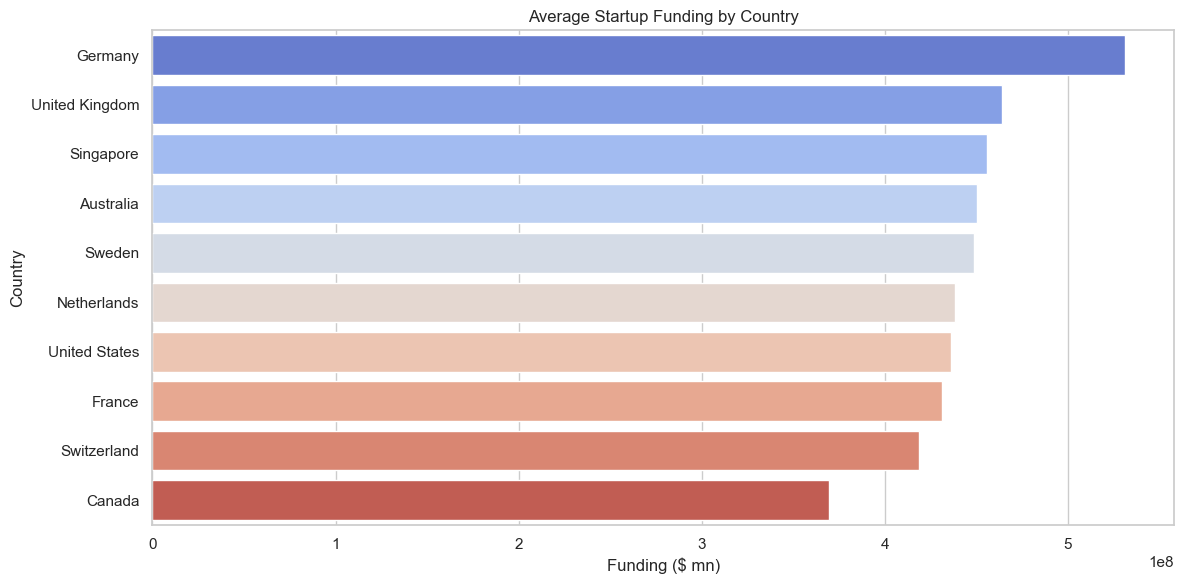

In [613]:
avg_funding_by_country = merged_df.groupby("country")["funding_amount_usd"].median().reset_index()
avg_funding_by_country = avg_funding_by_country.sort_values("funding_amount_usd", ascending=False)

top10_countries = avg_funding_by_country.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top10_countries, x="funding_amount_usd", y="country", palette="coolwarm")
plt.title("Average Startup Funding by Country")
plt.xlabel("Funding ($ mn)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


C:\Users\hazif\AppData\Local\Temp\ipykernel_53908\196216792.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_country, x="estimated_revenue_usd", y="country", palette="coolwarm")


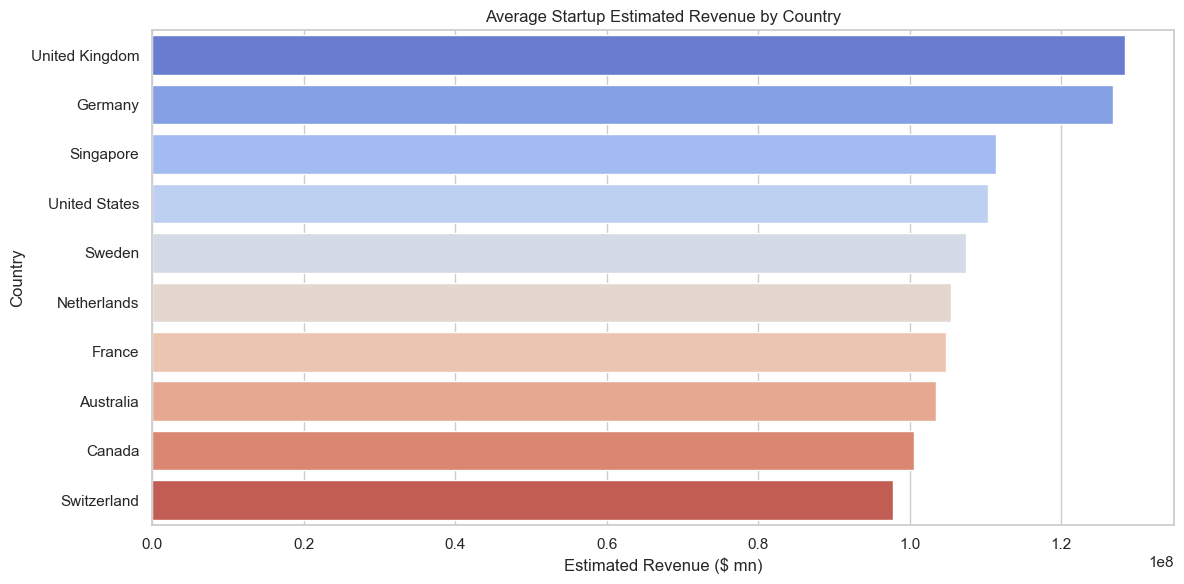

In [606]:
revenue_by_country = merged_df.groupby("country")["estimated_revenue_usd"].median().reset_index()
revenue_by_country = revenue_by_country.sort_values("estimated_revenue_usd", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=revenue_by_country, x="estimated_revenue_usd", y="country", palette="coolwarm")
plt.title("Average Startup Estimated Revenue by Country")
plt.xlabel("Estimated Revenue ($ mn)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

C:\Users\hazif\AppData\Local\Temp\ipykernel_53908\494045805.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_ev_by_industry, x="estimated_ev", y="industry", palette="magma")


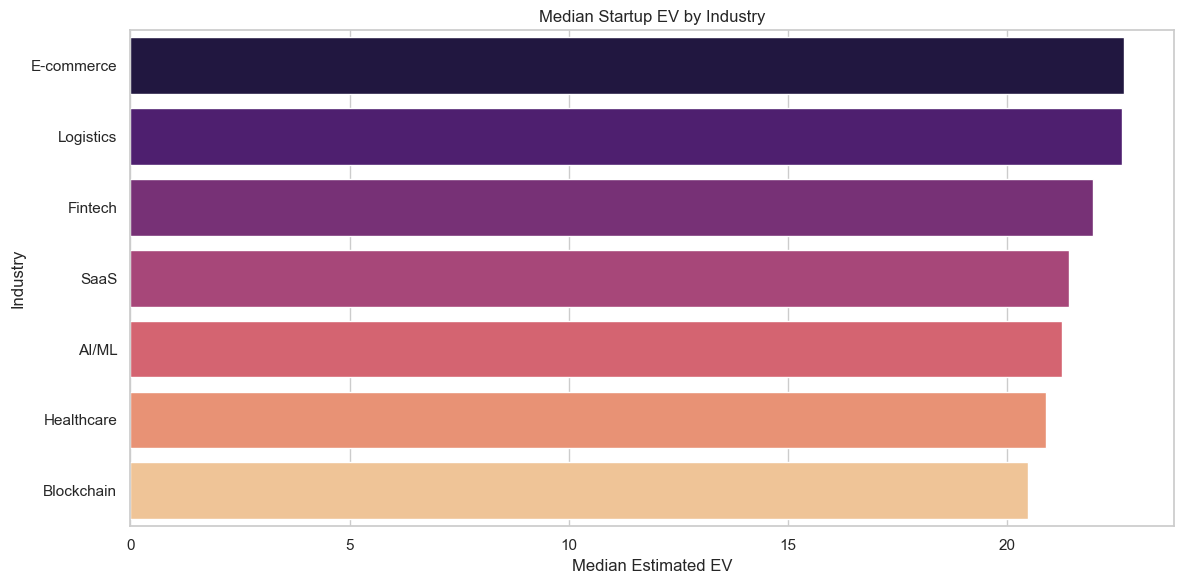

In [614]:
median_ev_by_industry = merged_df.groupby("industry")["estimated_ev"].median().reset_index()
median_ev_by_industry = median_ev_by_industry.sort_values("estimated_ev", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=median_ev_by_industry, x="estimated_ev", y="industry", palette="magma")
plt.title("Median Startup EV by Industry")
plt.xlabel("Median Estimated EV")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

C:\Users\hazif\AppData\Local\Temp\ipykernel_53908\1929041481.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=median_funding_by_industry, x="funding_amount_usd", y="industry", palette="magma")


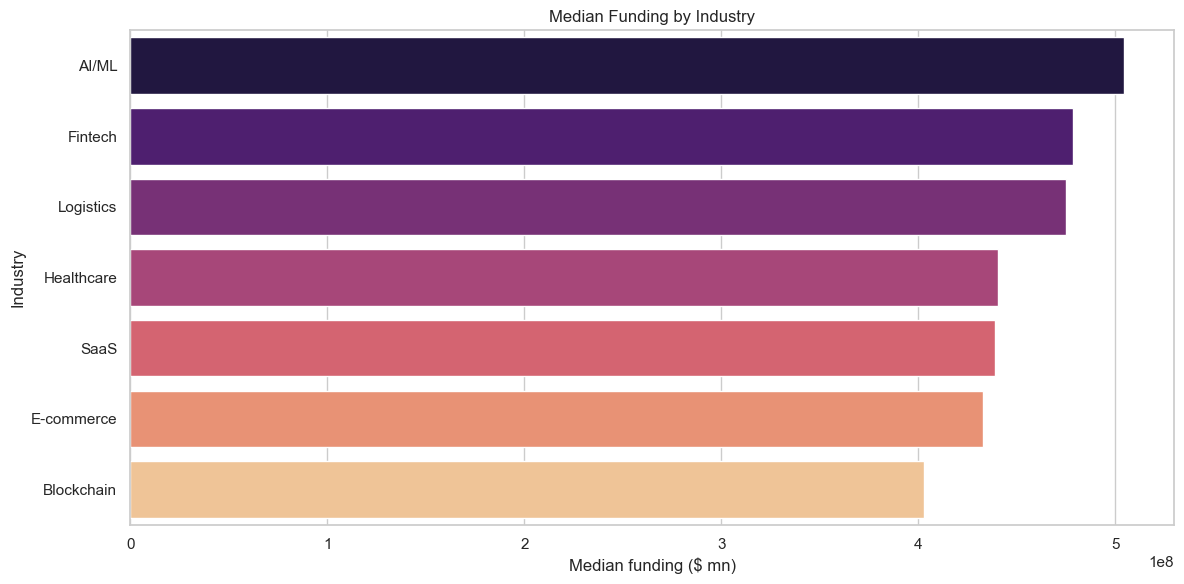

In [610]:
median_funding_by_industry = merged_df.groupby("industry")["funding_amount_usd"].median().reset_index()
median_funding_by_industry = median_funding_by_industry.sort_values("funding_amount_usd", ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(data=median_funding_by_industry, x="funding_amount_usd", y="industry", palette="magma")
plt.title("Median Funding by Industry")
plt.xlabel("Median funding ($ mn)")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()

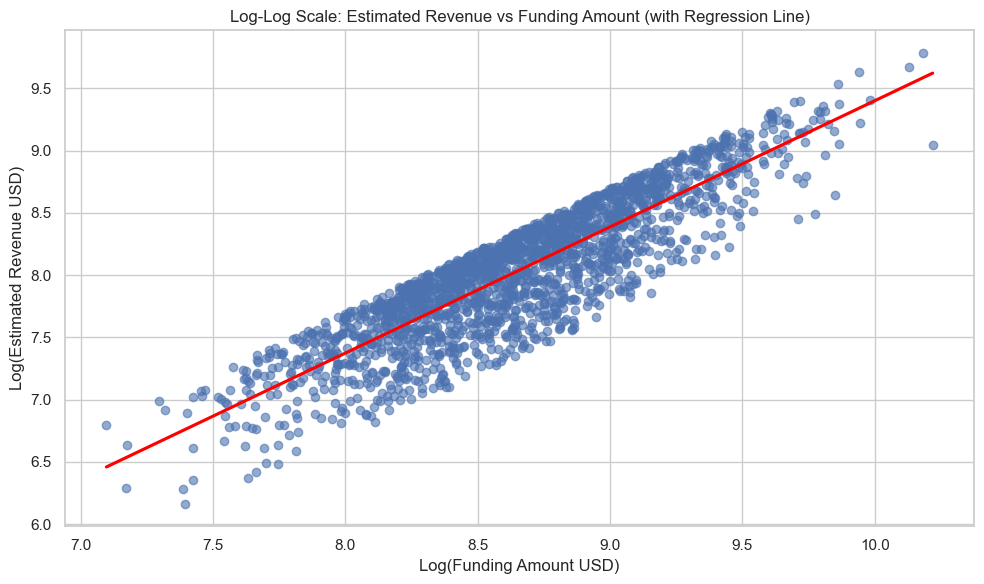

In [586]:
# Use log scale to standardize outliers
plt.figure(figsize=(10, 6))
sns.regplot(
    x=np.log10(merged_df['funding_amount_usd']),
    y=np.log10(merged_df['estimated_revenue_usd']),
    scatter_kws={'alpha': 0.6},
    line_kws={'color': 'red'},
    ci=None
)
plt.title('Log-Log Scale: Estimated Revenue vs Funding Amount (with Regression Line)')
plt.xlabel('Log(Funding Amount USD)')
plt.ylabel('Log(Estimated Revenue USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

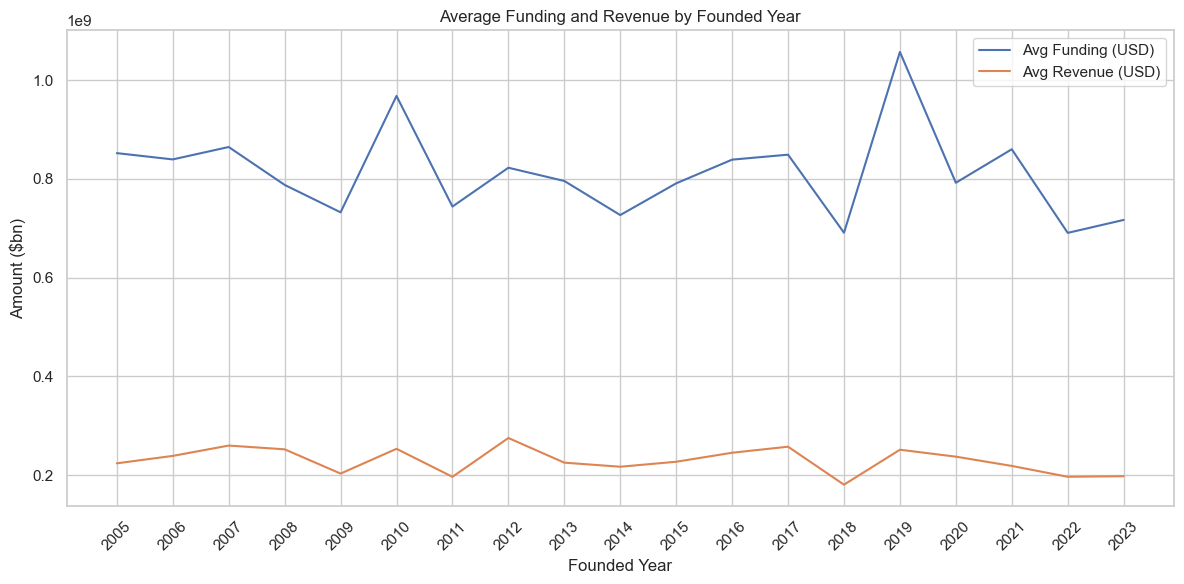

In [587]:
yearly_avg = merged_df.groupby('founded_year')[['funding_amount_usd', 'estimated_revenue_usd']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg, x='founded_year', y='funding_amount_usd', label='Avg Funding (USD)')
sns.lineplot(data=yearly_avg, x='founded_year', y='estimated_revenue_usd', label='Avg Revenue (USD)')
plt.title('Average Funding and Revenue by Founded Year')
plt.xlabel('Founded Year')
plt.ylabel('Amount ($bn)')
plt.legend()
plt.grid(True)

plt.xticks(ticks=yearly_avg['founded_year'], labels=yearly_avg['founded_year'].astype(int), rotation=45)

plt.tight_layout()
plt.show()

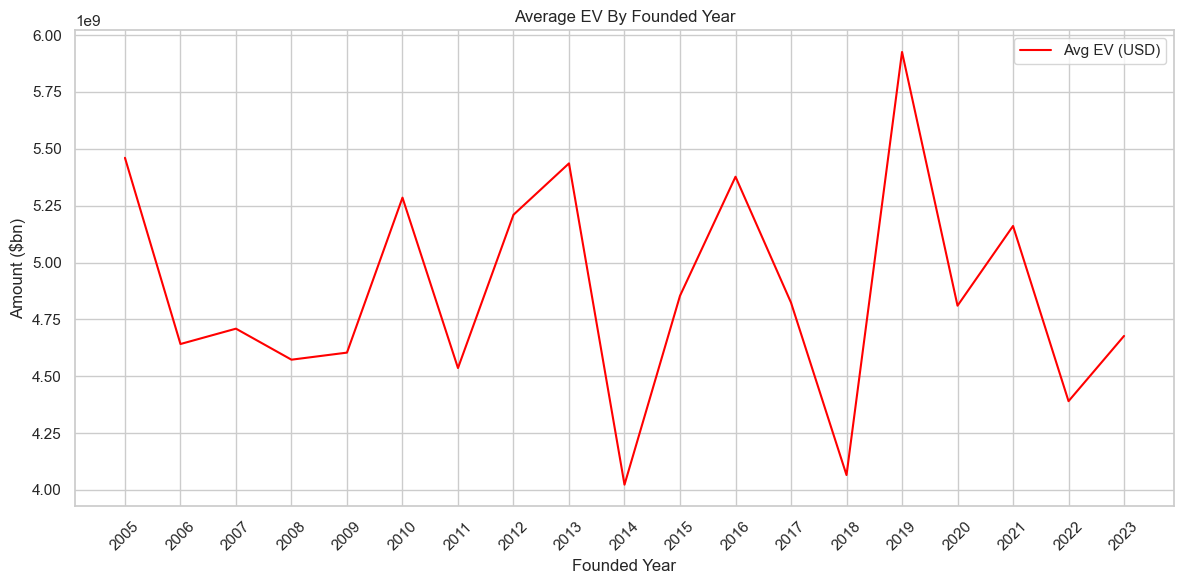

In [588]:
yearly_avg = merged_df.groupby('founded_year')[['estimated_valuation_usd']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg, x='founded_year', y='estimated_valuation_usd', label='Avg EV (USD)', color='red')
plt.title('Average EV By Founded Year')
plt.xlabel('Founded Year')
plt.ylabel('Amount ($bn)')
plt.legend()
plt.grid(True)

plt.xticks(ticks=yearly_avg['founded_year'], labels=yearly_avg['founded_year'].astype(int), rotation=45)

plt.tight_layout()
plt.show()

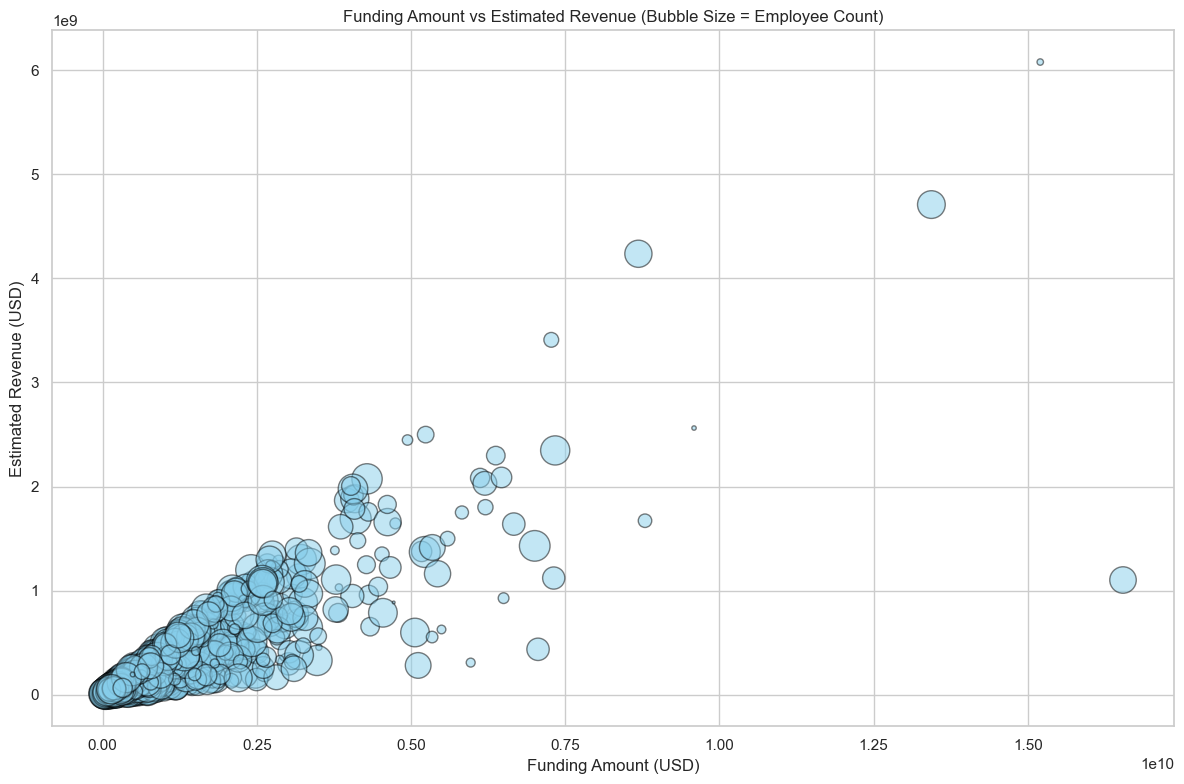

In [589]:
plt.figure(figsize=(12, 8))
plt.scatter(
    merged_df['funding_amount_usd'],
    merged_df['estimated_revenue_usd'],
    s=merged_df['employee_count'] / 2,  # scale bubble size
    alpha=0.5,
    c='skyblue',
    edgecolors='black'
)
plt.title('Funding Amount vs Estimated Revenue (Bubble Size = Employee Count)')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Estimated Revenue (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

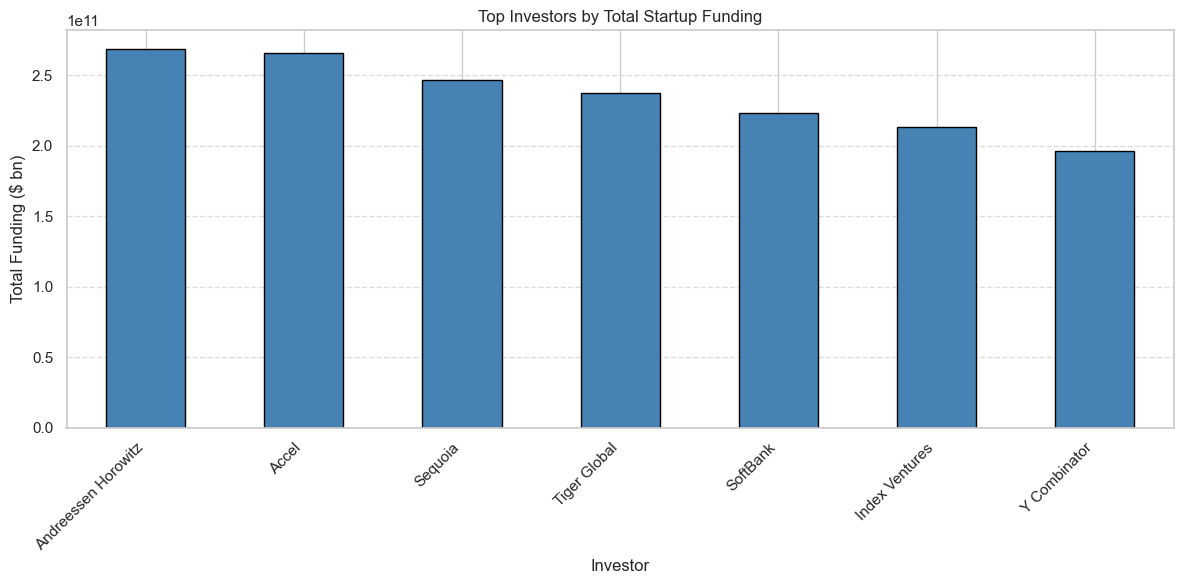

In [591]:
largest_funding_by_investor = (merged_df.groupby('lead_investor')['funding_amount_usd'].sum().sort_values(ascending=False))

plt.figure(figsize=(12, 6))
largest_funding_by_investor.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top Investors by Total Startup Funding')
plt.ylabel('Total Funding ($ bn)')
plt.xlabel('Investor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

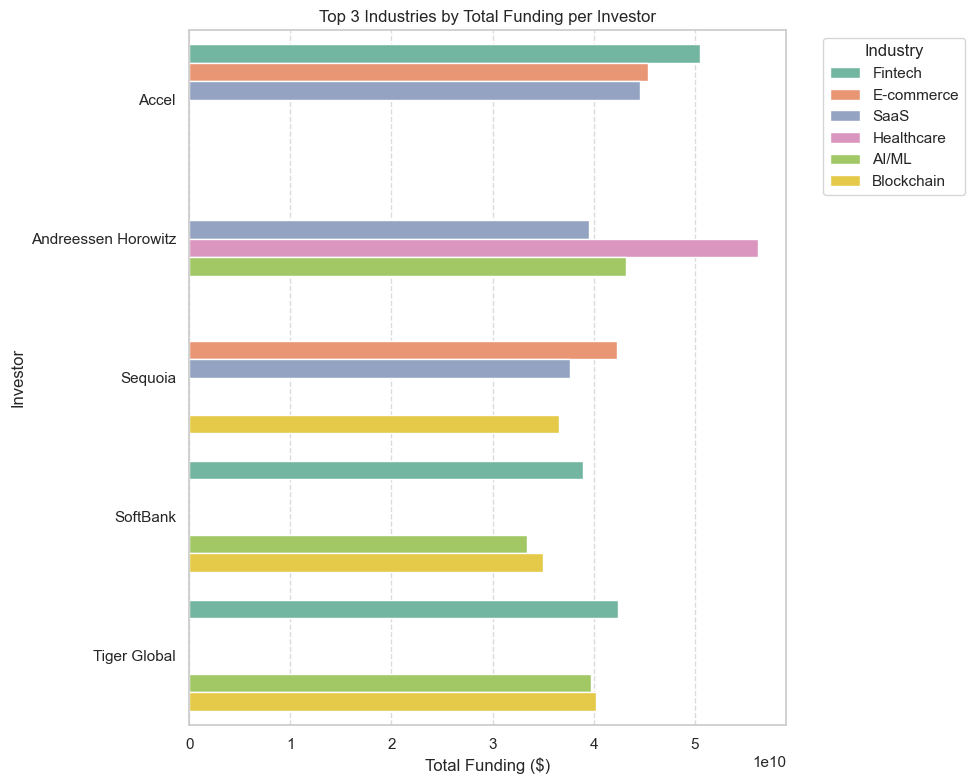

In [595]:
plt.figure(figsize=(10, 8))
sns.barplot(
    data=top3,
    y='lead_investor',
    x='funding_amount_usd',
    hue='industry',
    palette='Set2'
)
plt.title('Top 3 Industries by Total Funding per Investor')
plt.xlabel('Total Funding ($)')
plt.ylabel('Investor')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


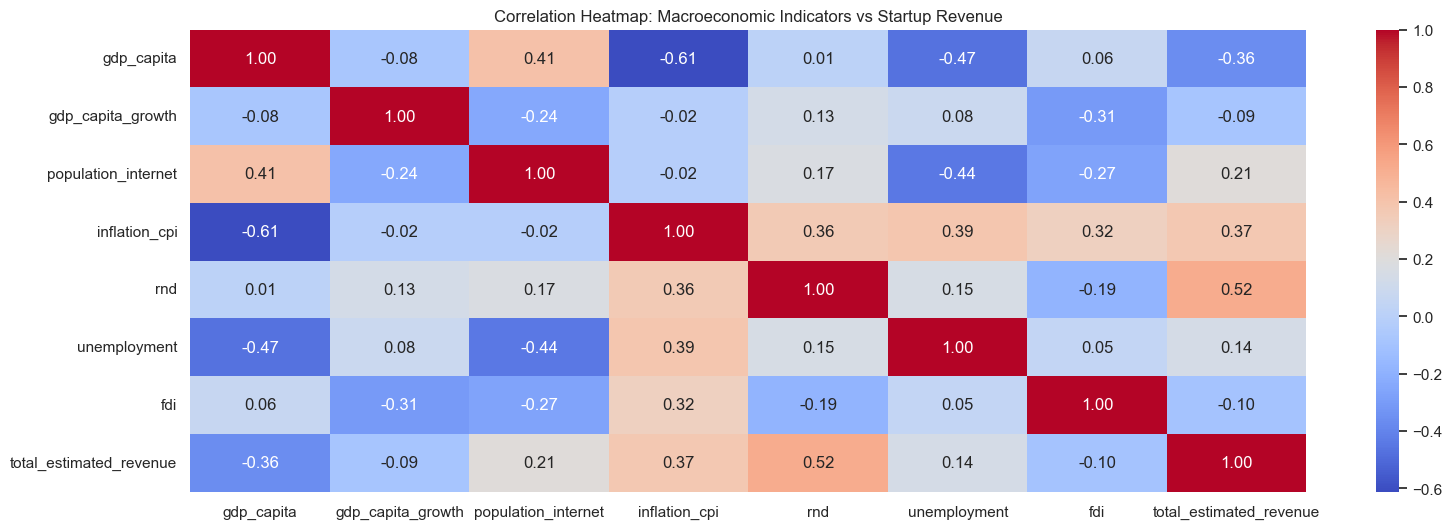

In [596]:
revenue_by_country = merged_df.groupby("country")["estimated_revenue_usd"].sum().reset_index()
revenue_by_country.rename(columns={"estimated_revenue_usd": "total_estimated_revenue"}, inplace=True)

macro_corr_df = countries_df.merge(revenue_by_country, on="country", how="inner")

numeric_cols = macro_corr_df.select_dtypes(include="number")

plt.figure(figsize=(18, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Macroeconomic Indicators vs Startup Revenue")
plt.show()

# Data Insights
Refer to presentation file -> `capstone_startups_presentation.pptx/pdf`